# <font color='green'>DnD Exploratory Analysis using R</font> 


###  <font color='grey'> A comprehensive code-along guide to data exploration and visualization with R, using ggplot, tidyr, scatterplot3d and rgl with DnD. </font> 

### <font color='grey'> 0. DATA PREPARATION</font> 

*Note:Have in mind that this uses a DnD weekly updated dataset by Burak Ogan https://github.com/oganm/dnddata. So patterns could change over time in classes and races which can affect the regular expression code for predclasses and predraces.*


In [4]:
options(warn = -1)
        
suppressWarnings(suppressMessages(devtools::install_github('oganm/dnddata')))

suppressWarnings(suppressMessages(library(dnddata)))

dnd<-na.omit(subset(dnd_chars_all[dnd_chars_all$HP>0,],select=c("name","race","class","country","HP","AC","Str","Dex","Con","Int","Wis","Cha")))

dnd<-dnd[dnd$HP<=400 & dnd$AC<=40,]

dnd$predclass<-gsub( " .*$|\\n", "", dnd$class )

require(data.table)
dt<-as.data.table(dnd)
dt[, .(count = .N), by = predclass]

Loading required package: data.table


predclass,count
Paladin,529
Barbarian,517
Fighter,916
Bard,403
Monk,411
Cleric,567
Ranger,440
Warlock,328
Sorcerer,359
Rogue,701


In [5]:
dnd$predrace <- ifelse(grepl("(?i)(.*human.*)", dnd$race), "Human",
                       ifelse(grepl("(?i)(.*half.*elf.*)", dnd$race), "Half-Elf",   
                              ifelse(grepl("(?i)(.*elf.*)", dnd$race), "Elf", 
                                     ifelse(grepl("(?i)(.*half.*orc.*)", dnd$race), "Half-Orc", 
                                            ifelse(grepl("(?i)(.*dragonborn.*)", dnd$race), "Dragonborn", 
                                                   ifelse(grepl("(?i)(.*tiefling.*)", dnd$race), "Tiefling",
                                                          ifelse(grepl("(?i)(.*dwarf.*)", dnd$race), "Dwarf",
                                                                 ifelse(grepl("(?i)(.*halfling.*)", dnd$race), "Halfling",
                                                                        ifelse(grepl("(?i)(.*tabaxi.*)", dnd$race), "Tabaxi",
                                                                               ifelse(grepl("(?i)(.*gnome.*)", dnd$race), "Gnome",
                                                                                      ifelse(grepl("(?i)(.*goliath.*)", dnd$race), "Goliath",
                                                                                             ifelse(grepl("(?i)(.*goblin.*)", dnd$race), "Goblin",
                                                                                                    ifelse(grepl("(?i)(.*firbolg.*)", dnd$race), "Firbolg",
                                                                                                           ifelse(grepl("(?i)(.*kenku.*)", dnd$race), "Kenku",
                                                                                                                  ifelse(grepl("(?i)(.*tortle.*|.*turtle.*)", dnd$race), "Tortle","Other")))))))))))))))


dnd$predclass<-ifelse(grepl("(?i)(.*Battle.*|.*Blood.*|.*commoner.*|.*Gunslinger.*|.*Revised.*|.*Crafting.*|.*Mystic.*|.*Artificer.*)",dnd$predclass),"Other",dnd$predclass)

dnd[dnd$predclass=="",'predclass'] = 'Other'

dt2<-as.data.table(dnd)
dt2[, .(count = .N), by = predclass]
dt2[, .(count = .N), by = predrace]

predclass,count
Paladin,529
Barbarian,517
Fighter,916
Bard,403
Monk,411
Cleric,567
Ranger,440
Warlock,328
Sorcerer,359
Rogue,701


predrace,count
Other,1171
Goliath,127
Tiefling,288
Dwarf,420
Firbolg,104
Tabaxi,152
Gnome,210
Half-Elf,414
Human,1260
Half-Orc,261


In [18]:
length(unique(dnd$predclass))

dnd<-dnd[,c(1,5:14)]

dnd[2:9]<-lapply(dnd[2:9],as.numeric)

dnd[10]<-lapply(dnd[10],as.factor)

dim(dnd)
str(dnd)
summary(dnd$HP)
head(dnd)

[1] 13

[1] 6045   11

'data.frame':	6045 obs. of  11 variables:
 $ name     : chr  "d584807" "d584807" "1334f8f" "2bd49d3" ...
 $ HP       : num  48 48 61 20 60 24 28 45 55 52 ...
 $ AC       : num  21 21 15 16 15 11 16 15 18 17 ...
 $ Str      : num  16 16 18 12 20 11 12 12 10 12 ...
 $ Dex      : num  8 8 14 12 15 11 18 18 18 13 ...
 $ Con      : num  14 14 16 12 17 10 15 12 13 16 ...
 $ Int      : num  10 10 9 10 13 12 10 10 16 10 ...
 $ Wis      : num  10 10 11 10 10 16 13 12 8 18 ...
 $ Cha      : num  18 18 10 10 14 15 9 15 12 8 ...
 $ predclass: Factor w/ 13 levels "Barbarian","Bard",..: 8 8 1 5 1 2 5 6 5 3 ...
 $ predrace : chr  "Other" "Other" "Goliath" "Tiefling" ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   14.00   31.00   44.25   56.00  390.00 

name,HP,AC,Str,Dex,Con,Int,Wis,Cha,predclass,predrace
d584807,48,21,16,8,14,10,10,18,Paladin,Other
d584807,48,21,16,8,14,10,10,18,Paladin,Other
1334f8f,61,15,18,14,16,9,11,10,Barbarian,Goliath
2bd49d3,20,16,12,12,12,10,10,10,Fighter,Tiefling
a01a261,60,15,20,15,17,13,10,14,Barbarian,Dwarf
61ef093,24,11,11,11,10,12,16,15,Bard,Firbolg


### <font color='grey'> 1. DISTRIBUTION NUMERIC VARIABLES </font>

#### *1.1 Numeric Variables visualization*

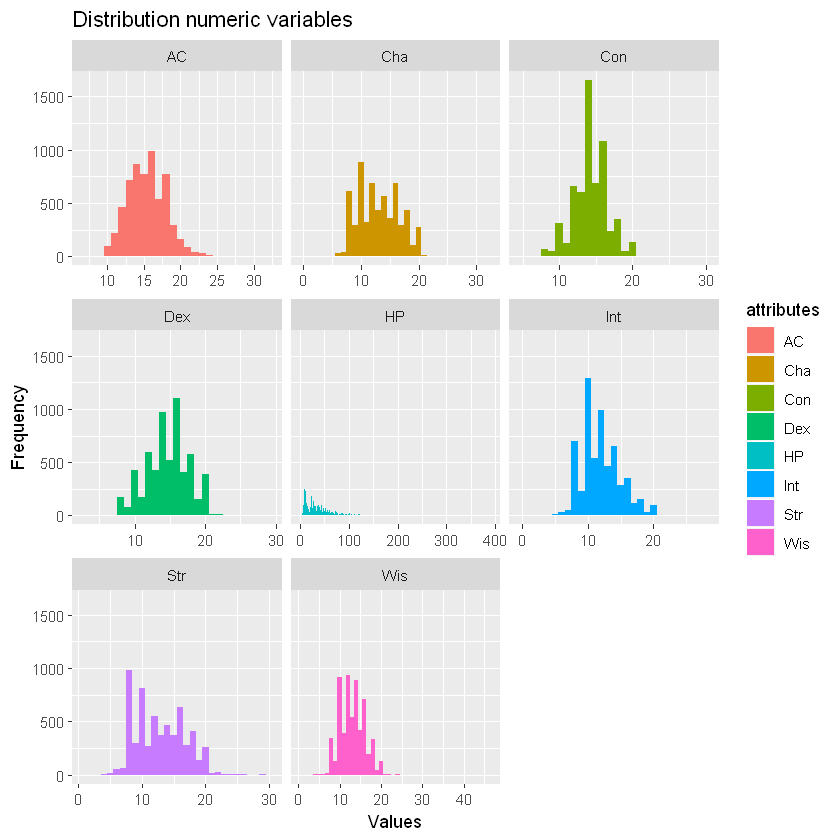

In [24]:
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(tidyr)))
suppressWarnings(suppressMessages(library(ggplot2)))

dnd %>%
  gather(attributes, value,2:9) %>% #4:9
  ggplot(aes(x = value)) +
  geom_histogram(aes(fill=attributes),binwidth=1) +facet_wrap(~attributes, scales = 'free_x') +
  labs(x="Values", y="Frequency", title="Distribution numeric variables") 


### <font color='grey'> 1.2 Correlation graph</font>

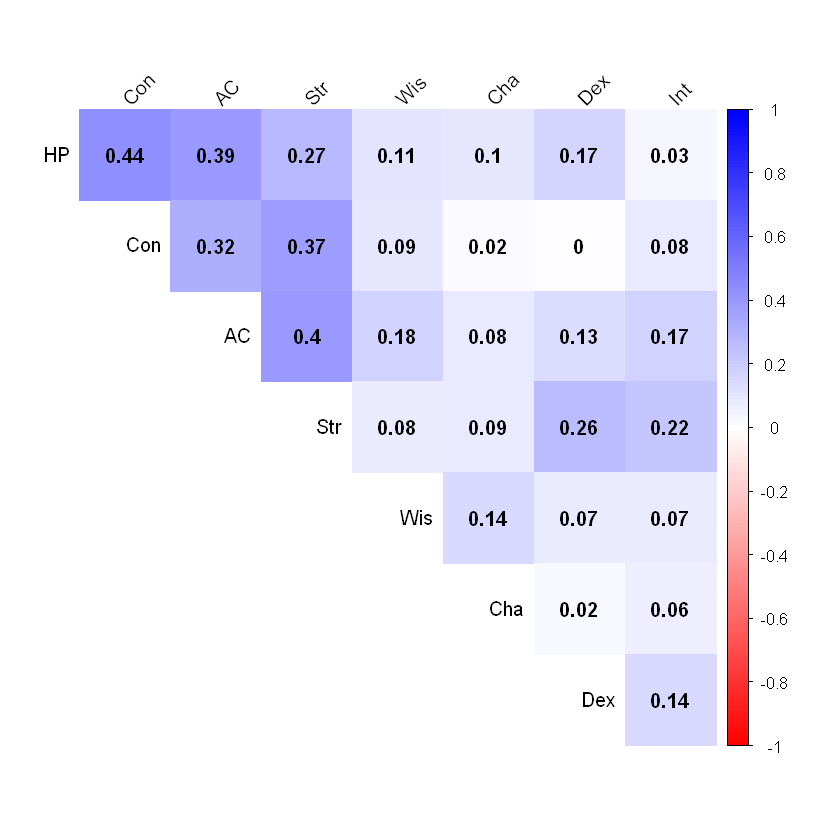

In [28]:
suppressWarnings(suppressMessages(library(corrplot)))
corrplot(abs(cor(dnd[,2:9])), method="color", col=colorRampPalette(c("red","white","blue")) (200), 
         type="upper", order="hclust", 
         addCoef.col = "black",
         tl.col="black", tl.srt=45,  sig.level = 0.01, 
         insig = "blank", diag=FALSE 
)

### <font color='grey'> 1.3 Fitting density</font>

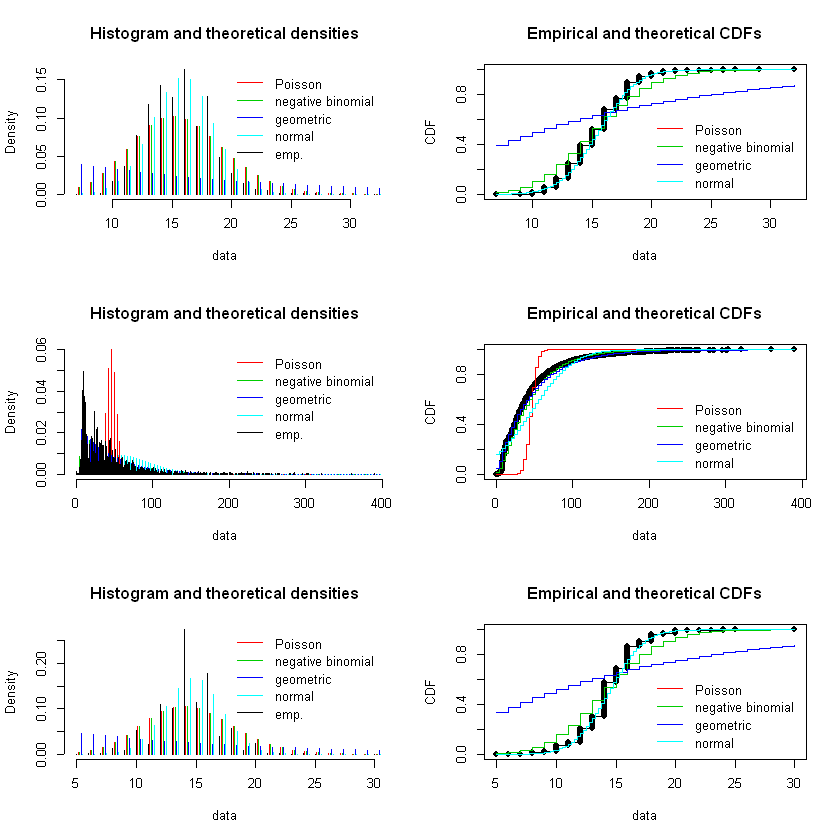

In [30]:
suppressWarnings(suppressMessages(library(fitdistrplus)))

par(mfrow = c(3,2))

fp <- fitdist(dnd$AC, "pois",discrete=TRUE)
fnb <- fitdist(dnd$AC, "nbinom",discrete=TRUE)
fg <- fitdist(dnd$AC, "geom",discrete=TRUE)
fn <- fitdist(dnd$AC, "norm",discrete=TRUE)

denscomp(list(fp,fnb,fg,fn),legendtext = c("Poisson", "negative binomial","geometric","normal"), fitlty = 1)
cdfcomp(list(fp,fnb,fg,fn),legendtext = c("Poisson", "negative binomial","geometric","normal"), fitlty = 1)

fp2 <- fitdist(dnd$HP, "pois",discrete=TRUE)
fnb2 <- fitdist(dnd$HP, "nbinom",discrete=TRUE)
fg2 <- fitdist(dnd$HP, "geom",discrete=TRUE)
fn2 <- fitdist(dnd$HP, "norm",discrete=TRUE)


denscomp(list(fp2,fnb2,fg2,fn2),legendtext = c("Poisson", "negative binomial","geometric","normal"), fitlty = 1)
cdfcomp(list(fp2,fnb2,fg2,fn2),legendtext = c("Poisson", "negative binomial","geometric","normal"), fitlty = 1)

fp3 <- fitdist(dnd$Con, "pois",discrete=TRUE)
fnb3 <- fitdist(dnd$Con, "nbinom",discrete=TRUE)
fg3 <- fitdist(dnd$Con, "geom",discrete=TRUE)
fn3 <- fitdist(dnd$Con, "norm",discrete=TRUE)


denscomp(list(fp3,fnb3,fg3,fn3),legendtext = c("Poisson", "negative binomial","geometric","normal"), fitlty = 1)
cdfcomp(list(fp3,fnb3,fg3,fn3),legendtext = c("Poisson", "negative binomial","geometric","normal"), fitlty = 1)

par(mfrow=c(1,1))

### <font color='grey'> 2. Classes and Races </font>

#### *2.1 circular histogram*

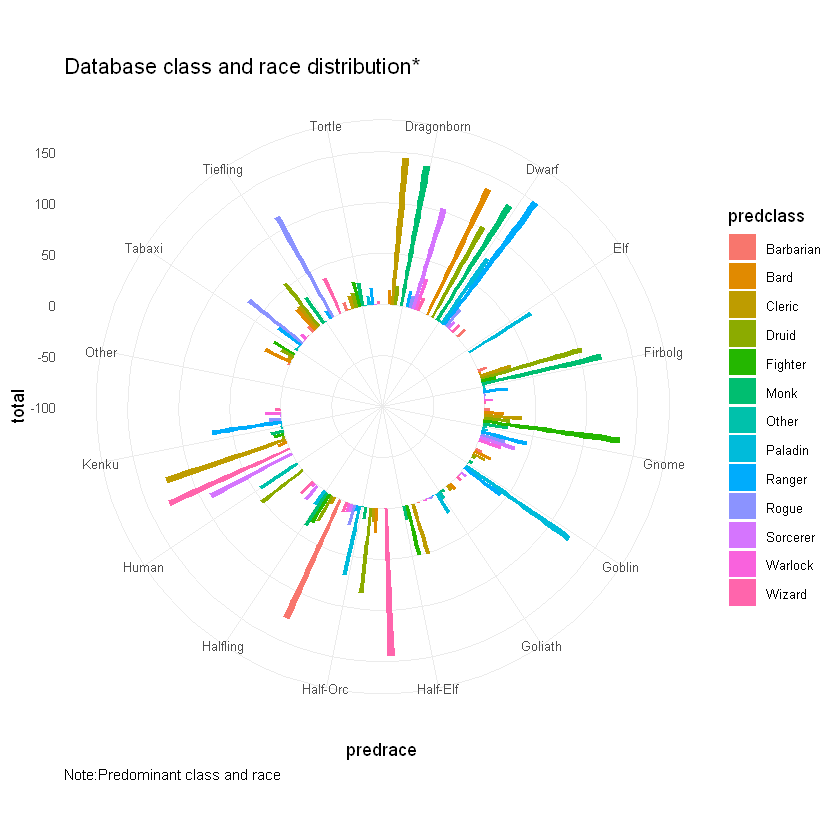

In [34]:
dnd_bar <- dnd %>%
  add_count(name) %>%
  group_by(predrace,predclass) %>%
  summarise(total = sum(n)) 

ggplot(dnd_bar, aes(x=predrace, y=total,fill=predclass),na.rm=TRUE) + 
  geom_bar(stat="identity",position="dodge") +
  ggtitle("Database class and race distribution*")+
  labs(caption="Note:Predominant class and race")+
  ylim(-100,150) +
  theme_minimal() +
  theme(
    axis.text=element_text(size=8),
    legend.text=element_text(size=8),
    plot.caption = element_text(hjust = 0)
  ) +
  coord_polar(start = 0)

### <font color='grey'> 2.2 Boxplot</font>

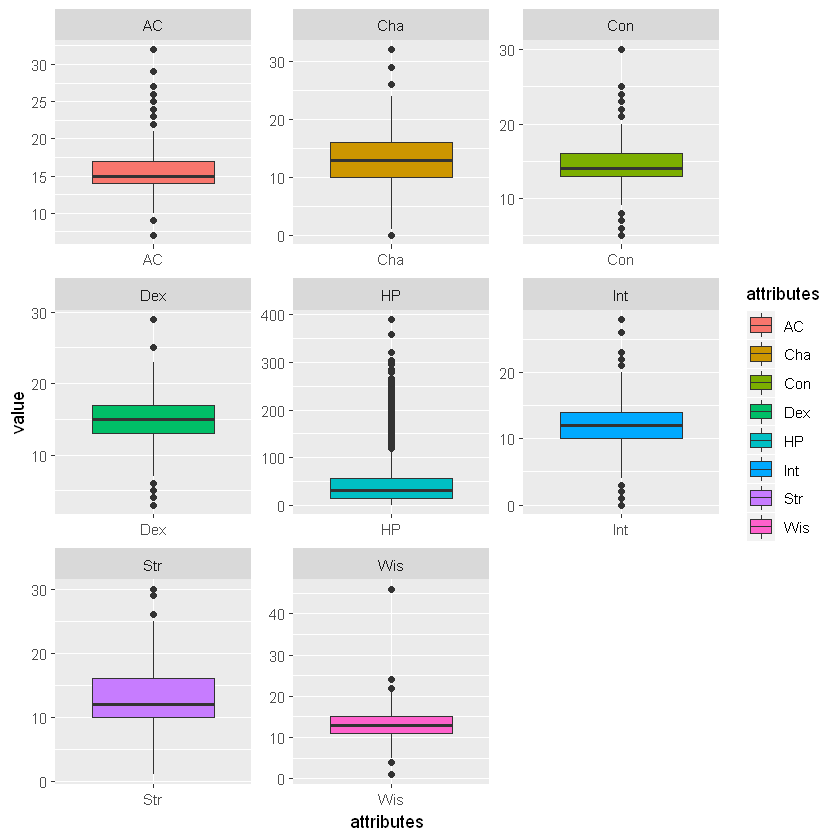

In [38]:
dnd %>%
  gather(attributes, value,2:9) %>%
  ggplot(aes(x=attributes, y=value)) + 
  geom_boxplot(aes(fill=attributes))+ facet_wrap( ~ attributes, scales="free")

suppressWarnings(suppressMessages(library(ggpubr)))

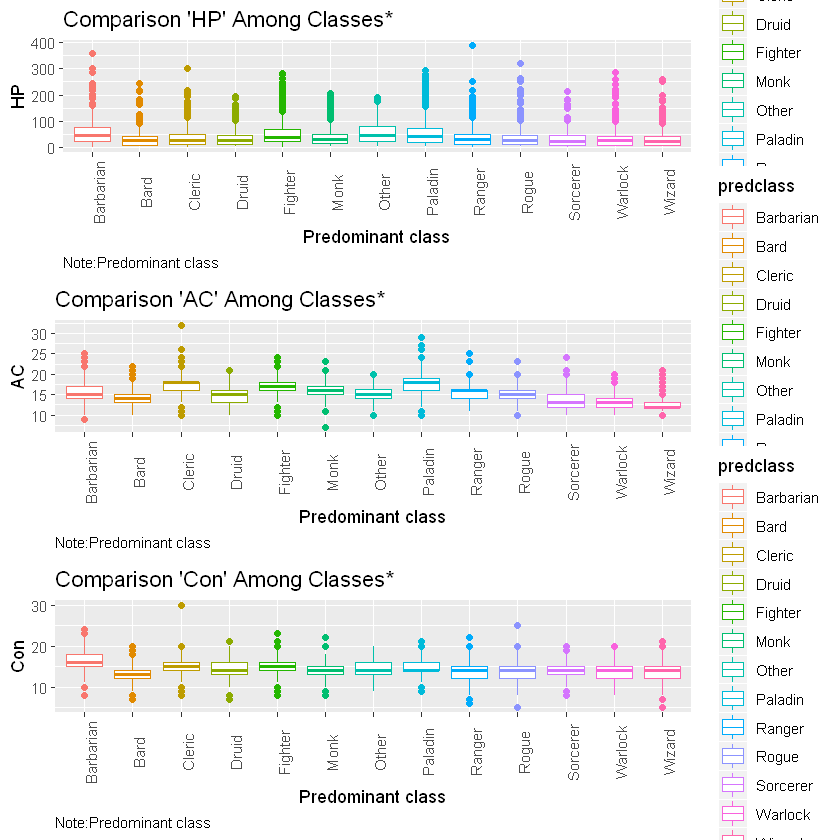

In [39]:

hp<-ggplot(dnd, aes(y =HP, x = predclass, color = predclass)) + xlab("Predominant class") + ylab("HP") + ggtitle("Comparison 'HP' Among Classes*") + geom_boxplot() + labs(caption="Note:Predominant class") + theme(axis.text.x = element_text(angle = 90),plot.caption = element_text(hjust = 0))

ac<-ggplot(dnd, aes(y =AC, x = predclass, color = predclass)) + xlab("Predominant class") + ylab("AC") + ggtitle("Comparison 'AC' Among Classes*") + geom_boxplot() + labs(caption="Note:Predominant class") + theme(axis.text.x = element_text(angle = 90),plot.caption = element_text(hjust = 0))

con<-ggplot(dnd, aes(y =Con, x = predclass, color = predclass)) + xlab("Predominant class") + ylab("Con") + ggtitle("Comparison 'Con' Among Classes*") + geom_boxplot() + labs(caption="Note:Predominant class") + theme(axis.text.x = element_text(angle = 90),plot.caption = element_text(hjust = 0))

ggarrange(hp,ac,con, ncol = 1, nrow = 3)

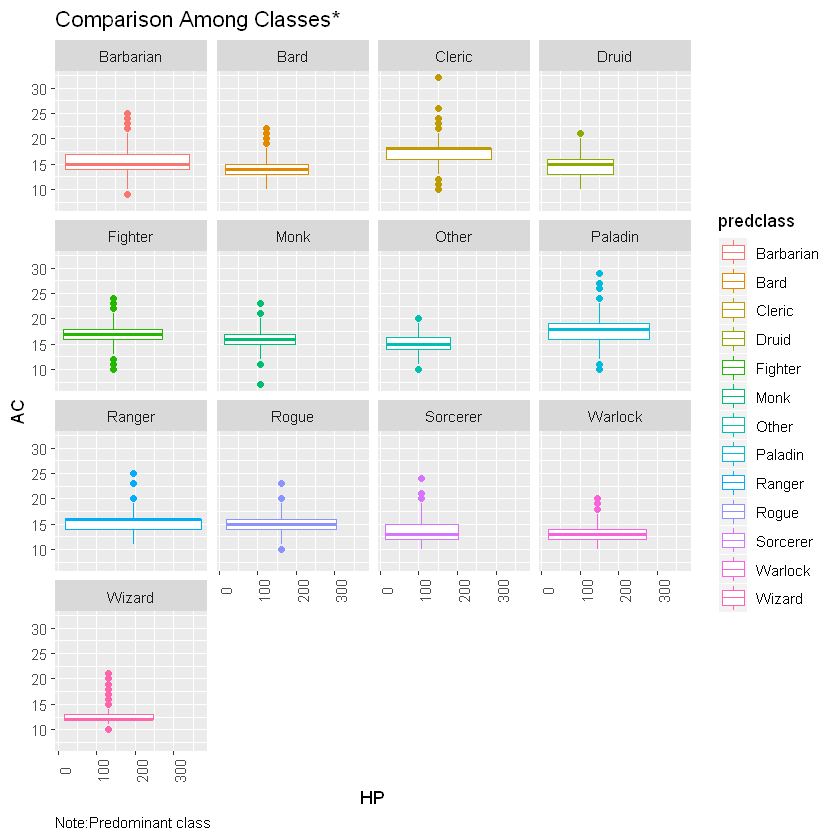

In [37]:
ggplot(dnd, aes(y = AC, x = HP,color=predclass)) + xlab("HP") + ylab("AC") + ggtitle(paste0("Comparison Among Classes*")) + geom_boxplot() + labs(caption="Note:Predominant class") + theme(axis.text.x = element_text(angle = 90),plot.caption = element_text(hjust = 0))+ facet_wrap(~predclass)

### <font color='grey'> 3 Scatter plot 3D  </font>

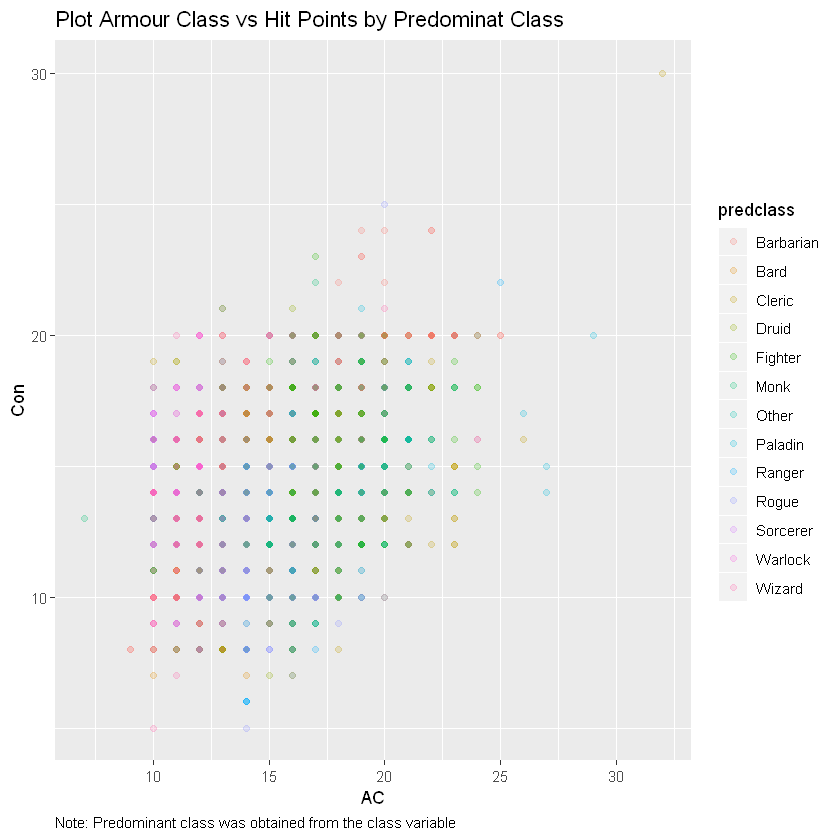

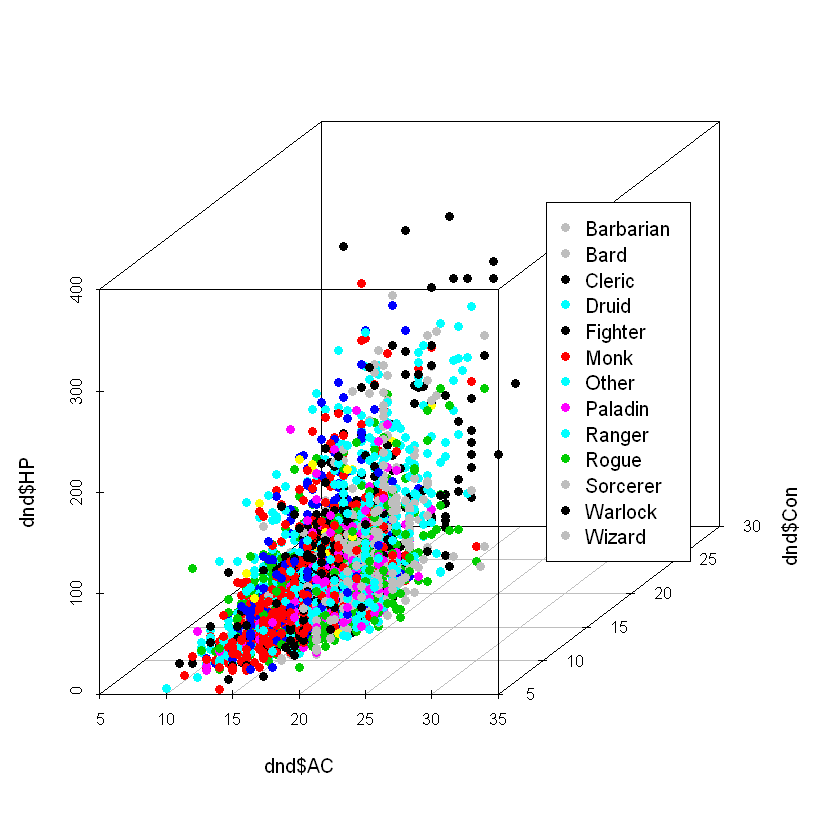

In [41]:
twod<-ggplot(dnd, aes(x = AC, y = Con, color = predclass)) + geom_point(alpha = 0.2) + labs( title = "Plot Armour Class vs Hit Points by Predominat Class", caption="Note: Predominant class was obtained from the class variable")+ theme(plot.caption = element_text(hjust = 0))
twod

library(scatterplot3d)
threed<-scatterplot3d(x =dnd$AC, y = dnd$Con, z = dnd$HP, color = as.numeric(dnd$predclass),pch=16,angle=30)
legend(threed$xyz.convert(40, 3, 500),legend = levels(dnd$predclass), col = as.numeric(dnd$predclass), pch = 16)

In [2]:
require(rgl)
with(dnd,plot3d(AC,Con,HP,col=as.integer(predclass),xlab="AC",ylab="Con",zlab="HP",box=TRUE,type="p"))

movie3d(spin3d(axis = c(0, 0, 1),rpm=5),duration = 20, type="gif",dir=".",movie="Scatterplot3d")

if (!rgl.useNULL())
  play3d(spin3d(axis = c(0, 0, 1), rpm = 5), duration = 20)

Loading required package: rgl


ERROR: Error in with(dnd, plot3d(AC, Con, HP, col = as.integer(predclass), xlab = "AC", : object 'dnd' not found


In [8]:
library(magick)
library(scatterplot3d)

labels<-as.character(unique(dnd$predclass))
frames <- length(labels)

for (i in 1:frames) {
  name<- paste('00',i,'plot.png', sep='')
  png(name)
  plot.new()
  sp3d<-scatterplot3d(x =dnd$AC, y = dnd$Con, z = dnd$HP, color="darkgrey", type="h",pch=16,angle=30)
  sp3d
  sp3d$points3d(dnd[dnd$predclass==labels[i],c("AC")],dnd[dnd$predclass==labels[i],c("Con")],dnd[dnd$predclass==labels[i],c("HP")],col="red", type="h", pch=16)
  legend(sp3d$xyz.convert(41, 3, 310),legend =c(labels[i],paste0("Non-",labels[i])), col =c("darkgrey","red"), pch = 16)
  dev.off()
}

list.files(path=".", pattern = '*.png', full.names = TRUE) %>% 
  image_read() %>% 
  image_join() %>% 
  image_animate(fps=4) %>% 
  image_write("dnd_classes.gif") 